In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from a2c.a2c import A2C
from environments.continuous_teaching import ContinuousTeaching

from a2c.a2c import A2C
from a2c.callback import ProgressBarCallback

from environments.continuous_teaching import ContinuousTeaching
from environments.discontinuous_teaching import DiscontinuousTeaching
from human_agents import generate_agents
from visualization_utils.episode_runs import run_one_episode


from baseline_policies.conservative import Conservative 


In [243]:
exp1=A2C.load('runs/discont_exp/run_1')
exp15=A2C.load('runs/discont_exp/run_1.5')
exp2=A2C.load('runs/discont_exp/run_2')
exp3=A2C.load('runs/discont_exp/run_3')
exp4=A2C.load('runs/discont_exp/run_4')


In [244]:
env1=exp2.env
env1.t_max = 600
env1.reward_coeff

1

In [245]:
rewards, actions=run_one_episode(env1, exp2, 3)

In [246]:
model=exp2

In [26]:
# monotonic case
b = [0]
for x in rewards:
    b += [b[-1] + x]

In [229]:
# exponential case
rewards = np.log10(np.array(rewards)) * env1.n_item

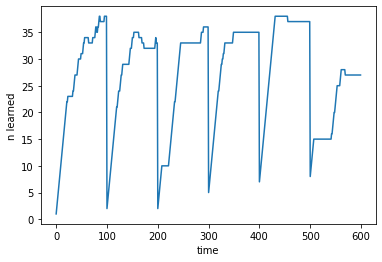

In [230]:
n_learned = np.array(rewards)#/20*env.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

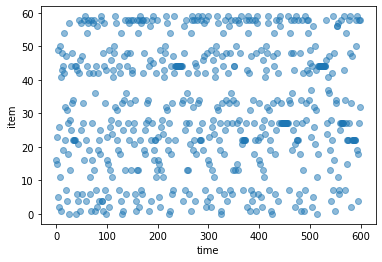

In [223]:
fig, ax = plt.subplots()
ax.scatter(np.arange(env1.t_max), actions, alpha=0.5)
ax.set_xlabel("time")
ax.set_ylabel("item");

In [48]:
env1.obs[0]

array([0.        , 0.        , 0.17122265])

In [247]:
policy = Conservative(env=env1)
# rewards2, actions2 = run_one_episode(env1, policy, is_a2c=False)

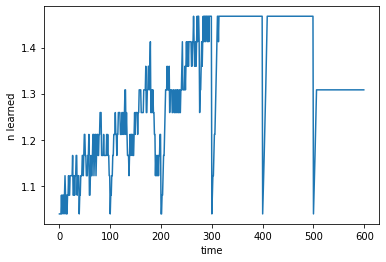

In [130]:
n_learned = np.array(rewards2)#*env1.n_item

fig, ax = plt.subplots()
ax.plot(n_learned)
ax.set_xlabel("time")
ax.set_ylabel("n learned");

In [29]:
model=monotonic

In [170]:
env1.reward_coeff

1

a2c 4.298662347082277
cons 6.072021956909885
a2c 4.641588833612778
cons 6.072021956909885
a2c 2.8183829312644537
cons 10.0
a2c 2.8183829312644537
cons 6.5564184941797885
a2c 4.298662347082277
cons 6.072021956909885


Text(0.5, 1.0, 'Conservative')

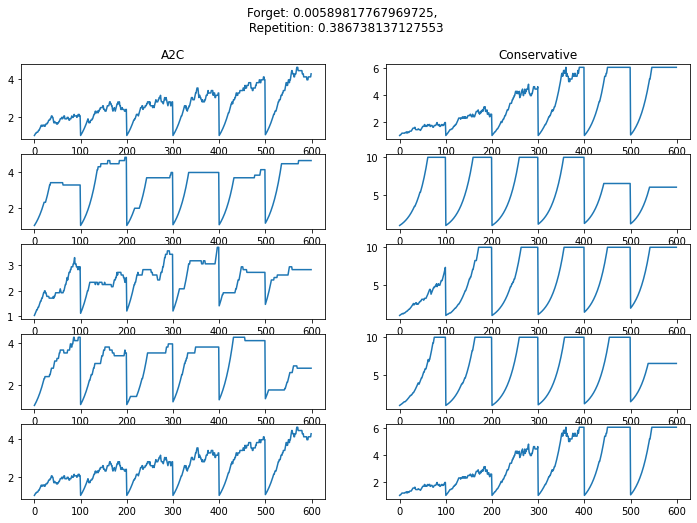

In [250]:
fig, axs = plt.subplots(5, 2, figsize=(12, 8))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    nl1 = np.array(r1)#*env.n_item
#     nlp1 = nl1[nl1>0]
#     nl1 = np.log10(nl1) * env1.n_item
    axs[i, 0].plot(nl1)
    print('a2c', nl1[-1])
    r2, a2 = run_one_episode(env1, policy, i, is_a2c=False)
    nl2 = np.array(r2)#*env.n_item
#     nlp2 = nl2[nl2>0]
#     nl2 = np.log10(nl2) * env1.n_item
    axs[i, 1].plot(nl2)
    print('cons', nl2[-1])
fig.suptitle('Forget: {}, \n Repetition: {}'.format(env1.all_forget_rates.mean(), env1.all_repetition_rates.mean()))
axs[0, 0].set_title('A2C')
axs[0, 1].set_title('Conservative')

Text(0.5, 1.0, 'Conservative')

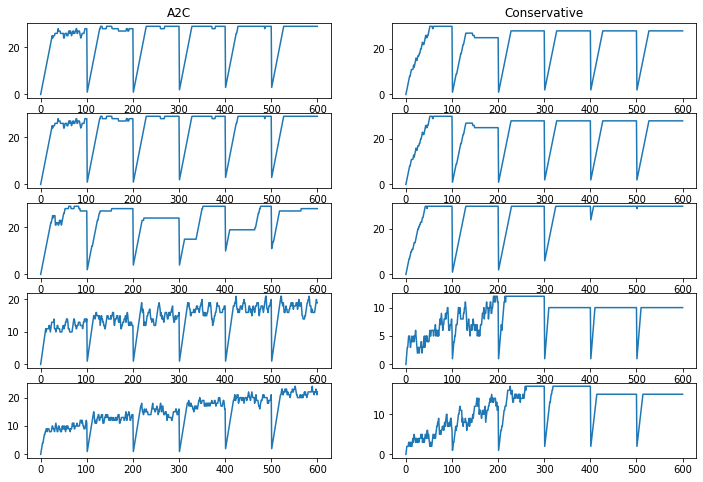

In [45]:
# monotonic case

fig, axs = plt.subplots(5, 2, figsize=(12, 8))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    nl1 = np.array(r1)#*env.n_item
#     nlp1 = nl1[nl1>0]
    b = [0]
    for x in nl1:
        b += [b[-1] + x]
    axs[i, 0].plot(b)
    r2, a2 = run_one_episode(env1, policy, i, is_a2c=False)
    nl2 = np.array(r2)#*env.n_item
#     nlp2 = nl2[nl2>0]
    b = [0]
    for x in nl2:
        b += [b[-1] + x]
    axs[i, 1].plot(b)
axs[0, 0].set_title('A2C')
axs[0, 1].set_title('Conservative')

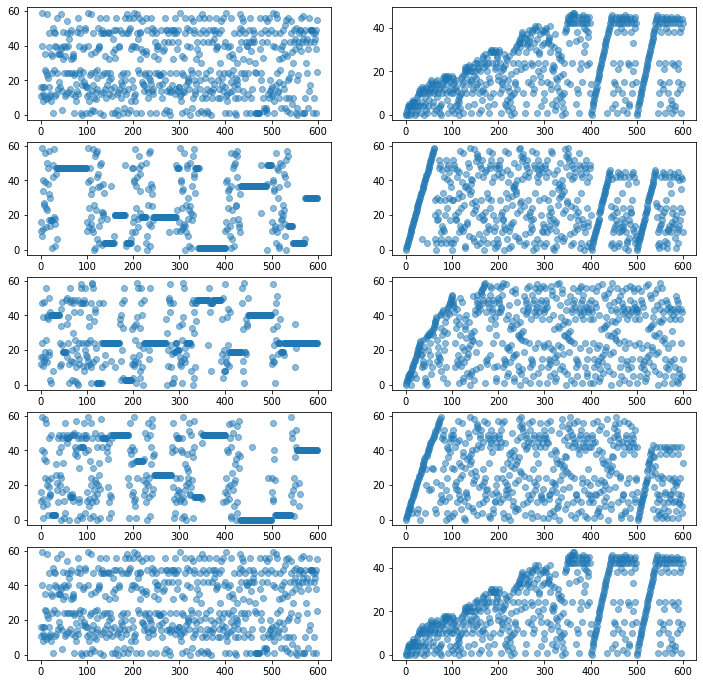

In [249]:
fig, axs = plt.subplots(5, 2, figsize=(12, 12))
for i in range(5):
    r1, a1 = run_one_episode(env1, model, i)
    axs[i, 0].scatter(np.arange(env1.t_max), a1, alpha=0.5)
    r2, a2 = run_one_episode(env1, policy, i, is_a2c=False)
    axs[i, 1].scatter(np.arange(env1.t_max), a2, alpha=0.5)